In [122]:
import numpy as np
import matplotlib.pyplot as plt
import imaids.utils as utils

In [63]:
#Read the file
def readfield(file_name, init):
    end_flag = 0
    with open(file_name, encoding='utf-8', errors='ignore') as my_file:
        data_col1 = []
        data_col2 = []
        col1_values = []
        col2_values = []
        for i,line in enumerate(my_file):
            if i >= init:
                list_data = line.split('\t') #returns a list
                if 'M' not in list_data[0]:
                    if end_flag == 0:
                        try:
                            data_col1.append(float(list_data[3]))
                            data_col2.append(float(list_data[5]))
                        except ValueError:
                            data_col1.append((list_data[3]))
                            data_col2.append((list_data[5]))
                else:
                    end_flag = 1
    my_file.close()
    z = np.array(data_col1)
    B = np.array(data_col2)
    return z,B

In [307]:
filename = "Map2701_X=-45.dat"
z,By = readfield(filename,24)#24 14669
By = -1*By/10e3


Text(0, 0.5, 'B [T]')

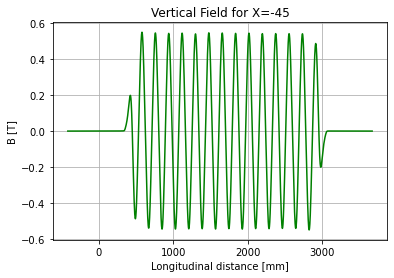

In [308]:
plt.plot(z,By, color='g')
plt.grid(True)
plt.title("Vertical Field for " + filename[int(len(filename)/2):-4])
plt.xlabel('Longitudinal distance [mm]')
plt.ylabel('B [T]')


In [166]:

fourier = utils.fit_fourier_components(By[5072:8645],freqs,z[5072:8645])
amps = fourier[0]

In [309]:
period = 180
hmax=5
freq0 = 2*np.pi/period
hs = np.array(range(1, hmax+1, 2))
freqs = hs*freq0
amps,*_ = utils.fit_fourier_components(By[5072:8645], freqs, z[5072:8645])
beff = np.sqrt(np.sum(np.power(amps/hs, 2)))

In [306]:
(0.759-0.768)/0.768

-0.01171875000000001

0.0012407877911538435
0.5294104978061963


(1000.0, 2000.0)

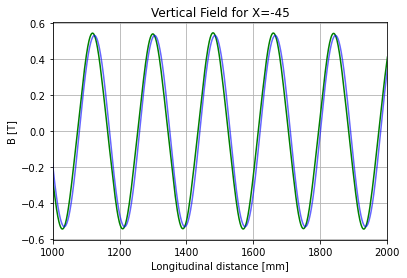

In [310]:
B_fit = amps[0]*np.sin(1*freq0*z)#+amps[1]*np.sin(3*freq0*z)+amps[2]*np.sin(5*freq0*z)

res = np.sum((B_fit[5072:8645]-By[5072:8645])**2)
res = np.sqrt(res)/len(z[5072:8645])
print(res)
print(amps[0])
plt.plot(z,By, color='g')
plt.plot(z,B_fit, color='b',alpha = 0.6)
plt.grid(True)
plt.title("Vertical Field for " + filename[int(len(filename)/2):-4])
plt.xlabel('Longitudinal distance [mm]')
plt.ylabel('B [T]')
plt.xlim(1000,2000)